In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.path.expanduser("~"), ".kaggle")

In [ ]:
!kaggle datasets download -d aleemaparakatta/cats-and-dogs-mini-dataset

Dataset URL: https://www.kaggle.com/datasets/aleemaparakatta/cats-and-dogs-mini-dataset
License(s): unknown
cats-and-dogs-mini-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cats-and-dogs-mini-dataset.zip	cats_vs_dogs_mini  kaggle.json	sample_data


In [ ]:
import zipfile
with zipfile.ZipFile("cats-and-dogs-mini-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("cats_vs_dogs_mini")

In [ ]:
import os
cnt = {"cats":0, "dogs":0}
for fname in os.listdir("cats_vs_dogs_mini"):
    if "cat" in fname:
        cnt["cats"] += 1
    elif "dog" in fname:
        cnt["dogs"] += 1
print(cnt)

{'cats': 1, 'dogs': 1}


In [ ]:
!pip install matplotlib numpy keras tensorflow pillow

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Correct path for Colab
DATA_DIR = '/content/cats_vs_dogs_mini'
IMG_SIZE = 128

data = []

# Corrected folder names
for category in ["cats_set", "dogs_set"]:
    path = os.path.join(DATA_DIR, category)
    label = 0 if category == "cats_set" else 1

    for img_file in os.listdir(path):
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])
        except Exception as e:
            print(f"Skipped {img_file} due to error: {e}")
            continue

X, y = zip(*data)
X = np.array(X) / 255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Training samples:", len(X_train))
print("✅ Testing samples:", len(X_test))


✅ Training samples: 800
✅ Testing samples: 200


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5023 - loss: 1.2197 - val_accuracy: 0.4800 - val_loss: 0.6933
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 831ms/step - accuracy: 0.5533 - loss: 0.6906 - val_accuracy: 0.5200 - val_loss: 0.6855
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 809ms/step - accuracy: 0.6141 - loss: 0.6671 - val_accuracy: 0.5650 - val_loss: 0.6868
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 853ms/step - accuracy: 0.7110 - loss: 0.5959 - val_accuracy: 0.6650 - val_loss: 0.6539
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 799ms/step - accuracy: 0.7805 - loss: 0.4922 - val_accuracy: 0.6300 - val_loss: 0.6475


Saving labrador-retriever-1210559_1280.jpg to labrador-retriever-1210559_1280.jpg


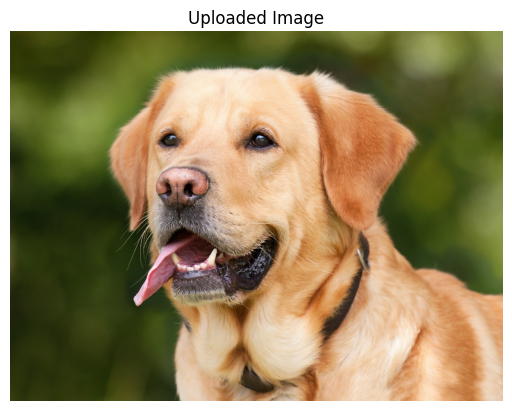

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Prediction: 🐶 Dog


In [ ]:
from PIL import Image
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image from local system
uploaded = files.upload()  # This will open a file chooser

# Get the uploaded filename
for filename in uploaded.keys():
    filepath = filename

# Show the uploaded image
img = Image.open(filepath)
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Function to predict if image is cat or dog
def predict_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    return "🐶 Dog" if prediction[0][0] > 0.5 else "🐱 Cat"

# Predict and show result
result = predict_image(filepath)
print("Prediction:", result)


Saving cute-domestic-kitten-sits-window-staring-outside-generative-ai.jpg to cute-domestic-kitten-sits-window-staring-outside-generative-ai (1).jpg


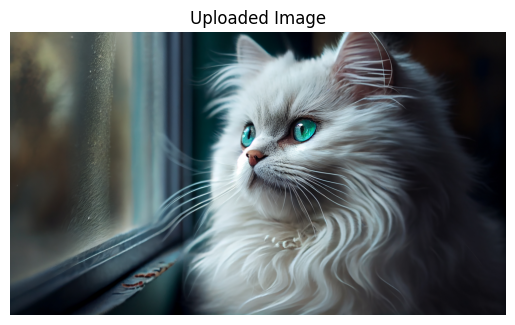

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: 🐱 Cat


In [37]:
from PIL import Image
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image from local system
uploaded = files.upload()  # This will open a file chooser

# Get the uploaded filename
for filename in uploaded.keys():
    filepath = filename

# Show the uploaded image
img = Image.open(filepath)
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Function to predict if image is cat or dog
def predict_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    return "🐶 Dog" if prediction[0][0] > 0.5 else "🐱 Cat"

# Predict and show result
result = predict_image(filepath)
print("Prediction:", result)
